# IBM DATA SCIENCE SPECIALIZATION

## Applied Data Science Capstone project
### this notebook will be mainly used for the course 9 capstone project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


### read end analyze data

In [3]:
# https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
# df.info()
# df.shape[0]-df['ROADCOND'].value_counts().sum()
# df.head()
# df['ADDRTYPE'].value_counts()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Importing needed modules and define plot

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
# from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import preprocessing
%matplotlib inline
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Import k-nearest neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Analyse data bias and correlation

#### Check label bias

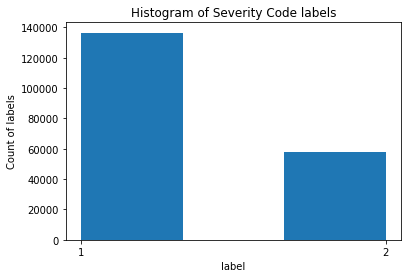

In [7]:
df['SEVERITYCODE'].plot(kind='hist',bins=3, figsize=(6, 4))
labels, counts = np.unique(df['SEVERITYCODE'], return_counts=True)
plt.title('Histogram of Severity Code labels')
plt.ylabel('Count of labels') # add y-label
plt.xlabel('label') # add x-label
plt.gca().set_xticks(labels)
plt.show()

In [8]:
print("absolute numbers of labels: \n", df['SEVERITYCODE'].value_counts(),"\n")
print("normalized numbers of labels: \n",df['SEVERITYCODE'].value_counts(normalize=True))

absolute numbers of labels: 
 1    136485
2     58188
Name: SEVERITYCODE, dtype: int64 

normalized numbers of labels: 
 1    0.701099
2    0.298901
Name: SEVERITYCODE, dtype: float64


#### Change list values to Int


In [9]:
df['WEATHER'].value_counts()
df['WEATHER'].fillna('Other', inplace=True)
df['WEATHER'].replace(to_replace=['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind','Partly Cloudy'], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)

df['ROADCOND'].value_counts()
df['ROADCOND'].fillna('Other', inplace=True)
df['ROADCOND'].replace(to_replace=['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'], value=[0,1,2,3,4,5,6,7,8],inplace=True)

df['LIGHTCOND'].value_counts()
df['LIGHTCOND'].fillna('Other', inplace=True)
df['LIGHTCOND'].replace(to_replace=['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'], value=[0,1,2,3,4,5,6,7,8],inplace=True)

df['SPEEDING'].fillna('No', inplace=True)
df['SPEEDING'].value_counts()
df['SPEEDING'].replace(to_replace=['No','Y'], value=[0,1],inplace=True)

# df['SPEEDING'].value_counts()
# df['LIGHTCOND'].value_counts()
# df['ROADCOND'].value_counts()
# df['WEATHER'].value_counts()
# df['INATTENTIONIND'].value_counts()

#### verify correlation between features

In [10]:
df.corr('pearson')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,SPEEDING,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,-0.105268,-0.096206,-0.078245,0.004226,0.038938,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.009759,-0.004657,-0.011382,-0.001016,-0.008163,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,0.018716,0.010456,0.000140,-0.006958,-0.026607,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.067216,0.103883,0.111220,0.969276,-0.039174,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.073197,0.115000,0.126444,0.990571,-0.040453,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.073192,0.115026,0.126510,0.990571,-0.040420,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.002259,0.006349,0.007424,0.032604,0.002937,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,-0.105268,-0.096206,-0.078245,0.004226,0.038938,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,-0.090650,-0.093463,-0.084861,0.011784,-0.002963,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,-0.031904,-0.032883,-0.020716,0.021461,-0.032838,0.001810,0.565326


#### Balancing the data to cancel bias

In [11]:
df_2=df[df.SEVERITYCODE==2]
df_1=df[df.SEVERITYCODE==1]
df_1=resample(df_1,replace=False,n_samples=58188,random_state=123)
df_new=pd.concat([df_1,df_2])
df_new['SEVERITYCODE'].value_counts()
print("absolute numbers of labels: \n", df_new['SEVERITYCODE'].value_counts(),"\n")
print("normalized numbers of labels: \n",df_new['SEVERITYCODE'].value_counts(normalize=True))


absolute numbers of labels: 
 2    58188
1    58188
Name: SEVERITYCODE, dtype: int64 

normalized numbers of labels: 
 2    0.5
1    0.5
Name: SEVERITYCODE, dtype: float64


#### Features selection

In [12]:
#Selection of the most interesting features and the target value
X=df_new[['PERSONCOUNT','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']].values
y=df_new['SEVERITYCODE']
X= preprocessing.StandardScaler().fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### Split the samples: 80% training set, 20% testing set

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Training set:', X_train.shape, y_train.shape) 
print ('Testing set:', X_test.shape, y_test.shape)


Training set: (93100, 5) (93100,)
Testing set: (23276, 5) (23276,)


### k-nearest neighbors algorithm

Iteration n.:  1
Iteration n.:  2
Iteration n.:  3
Iteration n.:  4
Iteration n.:  5
Iteration n.:  6
Iteration n.:  7
Iteration n.:  8
Iteration n.:  9
Iteration n.:  10
Iteration n.:  11
Iteration n.:  12
Iteration n.:  13
Iteration n.:  14
Iteration n.:  15
Iteration n.:  16
Iteration n.:  17
Iteration n.:  18
Iteration n.:  19
Best accuracy for k= 17


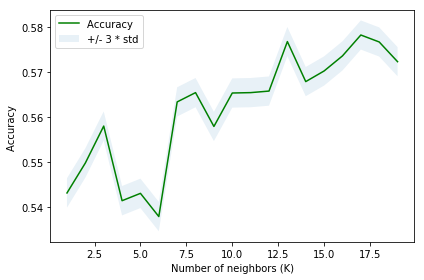

In [14]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    print('Iteration n.: ', n)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
print ("Best accuracy for k=", mean_acc.argmax()+1)


plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3 * std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of neighbors (K)')
plt.tight_layout()
plt.show()

In [15]:
neigh = KNeighborsClassifier(n_neighbors = (mean_acc.argmax()+1)).fit(X_train,y_train)
yhat=neigh.predict(X_test)

Confusion matrix, without normalization
[[6735 4877]
 [4940 6724]]


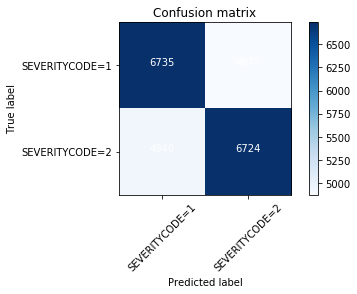

In [16]:
plot_confusion_matrix(confusion_matrix(y_test, yhat, labels=[1,2]), classes=['SEVERITYCODE=1','SEVERITYCODE=2'],normalize= False,  title='Confusion matrix')

In [17]:
from sklearn import metrics
from sklearn.metrics import f1_score
KNNf1=f1_score(y_test, yhat, average='weighted')
# from sklearn.metrics import jaccard_score   issue with sklearn version!
from sklearn.metrics import jaccard_similarity_score as jaccard_score
KNNjac=jaccard_score(y_test, yhat)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("The F1-score is",KNNf1 )
print("The Jaccard similarity score is",KNNjac)

Train set Accuracy:  0.5818796992481203
Test set Accuracy:  0.578235091940196
The F1-score is 0.578234552445627
The Jaccard similarity score is 0.578235091940196


### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree.fit(X_train,y_train)
predTree = Tree.predict(X_test)

Confusion matrix, without normalization
[[8151 3461]
 [6087 5577]]


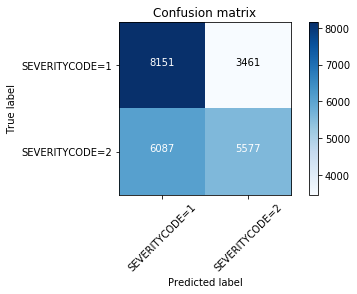

In [19]:
plot_confusion_matrix(confusion_matrix(y_test, predTree, labels=[1,2]), classes=['SEVERITYCODE=1','SEVERITYCODE=2'],normalize= False,  title='Confusion matrix')

In [20]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, Tree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predTree))
from sklearn.metrics import f1_score
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
DTf1= f1_score(y_test, predTree, average='weighted')
print("The F1-score is",DTf1 )
DTjac=jaccard_score(y_test, predTree)
print("The Jaccard similarity score is",DTjac)

Train set Accuracy:  0.5894414607948443
Test set Accuracy:  0.5897920604914934
DecisionTrees's Accuracy:  0.5897920604914934
The F1-score is 0.5846108113676355
The Jaccard similarity score is 0.5897920604914934


### Support Vector Machine

In [21]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X_train, y_train)
yhat2 = clf.predict(X_test)

Confusion matrix, without normalization
[[8057 3555]
 [5985 5679]]


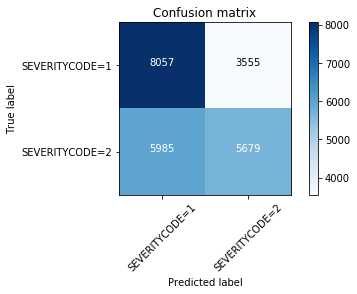

In [23]:
plot_confusion_matrix(confusion_matrix(y_test, yhat2, labels=[1,2]), classes=['SEVERITYCODE=1','SEVERITYCODE=2'],normalize= False,  title='Confusion matrix')

In [24]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat2))
from sklearn.metrics import f1_score
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, yhat2))
SVMf1=f1_score(y_test, yhat2, average='weighted')
print("The F1-score is",SVMf1 )
SVMjac=jaccard_score(y_test, yhat2)
print("The Jaccard similarity score is",SVMjac)

Train set Accuracy:  0.5899355531686359
Test set Accuracy:  0.5901357621584464
SVM's Accuracy:  0.5901357621584464
The F1-score is 0.5857180406481002
The Jaccard similarity score is 0.5901357621584464


Normalized confusion matrix
[[0.69385119 0.30614881]
 [0.51311728 0.48688272]]


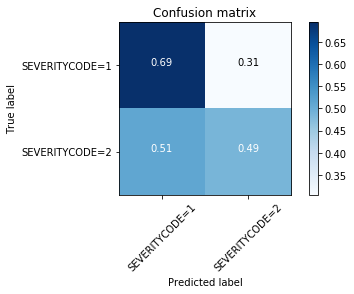

In [25]:
plot_confusion_matrix(confusion_matrix(y_test, yhat2, labels=[1,2]), classes=['SEVERITYCODE=1','SEVERITYCODE=2'],normalize= True,  title='Confusion matrix')

### Logistic Regression

In [26]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat3 = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [27]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat3))
from sklearn.metrics import f1_score
print("LR's Accuracy: ", metrics.accuracy_score(y_test, yhat3))
LRf1=f1_score(y_test, yhat3, average='weighted')
print("The F1-score is", LRf1)
LRjac=jaccard_score(y_test, yhat3)
print("The Jaccard similarity score is",LRjac)
from sklearn.metrics import log_loss
LRll=log_loss(y_test, yhat_prob)
print("The logLoss value is:",LRll)

Train set Accuracy:  0.5743179377013964
Test set Accuracy:  0.5835195050695996
LR's Accuracy:  0.5835195050695996
The F1-score is 0.5816742365301966
The Jaccard similarity score is 0.5835195050695996
The logLoss value is: 0.6745506731827459


Confusion matrix, without normalization
[[6005 5607]
 [4087 7577]]


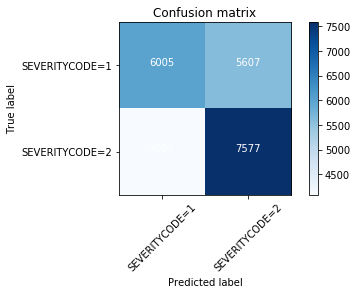

In [28]:
plot_confusion_matrix(confusion_matrix(y_test, yhat3, labels=[1,2]), classes=['SEVERITYCODE=1','SEVERITYCODE=2'],normalize= False,  title='Confusion matrix')

### Evaluation

Confronting the metrics of the different models, we look for the highest F1 score, the largest Jaccard score and the smallest log loss.

So I selected the Decsion Tree, and retrained the model over the integral Data Set (without splitting it)

In [33]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Conclusion

The model can non be used to predict the severity of an accident, on the base of features (parameters) observable on site or remotely, to let the stakeholders make an informed decision